# color theme

## a. color list and cmap
---
We often use color in matplotlib in the format of parameters such as (xxx,color = 'red',xxx) or (xxx, c = (0.1,0.1,0.1), xxx) 

[matplotlib colors offical web](https://matplotlib.org/api/colors_api.html)

Matplotlib recognizes the following formats to specify a color:
+ an RGB or RGBA tuple of float values in [0, 1] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3));
+ a hex RGB or RGBA string (e.g., '#0f0f0f' or '#0f0f0f80'; case-insensitive);
+ a string representation of a float value in [0, 1] inclusive for gray level (e.g., '0.5');
+ one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
+ a X11/CSS4 color name (case-insensitive);
+ a name from the xkcd color survey, prefixed with 'xkcd:' (e.g., 'xkcd:sky blue'; case insensitive);
+ one of the Tableau Colors from the 'T10' categorical palette (the default color cycle): {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} (case-insensitive);
+ a "CN" color spec, i.e. 'C' followed by a number, which is an index into the default property cycle (matplotlib.rcParams['axes.prop_cycle']); the indexing is intended to occur at rendering time, and defaults to black if the cycle does not include color.

I often use CSS4_COLORS names and RGB tuple of float values.
![CSS4_COLORS](./images/named_colors.png)

RGB values can be obtained from softwares such as windows paint of MS offices(need to /255 because float values here in [0, 1]).

---
Another type is color map which is often be used as cmap = XXx, XXX can be a string or array of RGBA.
[colormaps reference link](https://matplotlib.org/examples/color/colormaps_reference.html)

color map themes is shown in the link above.


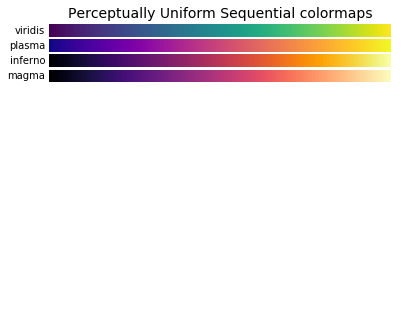

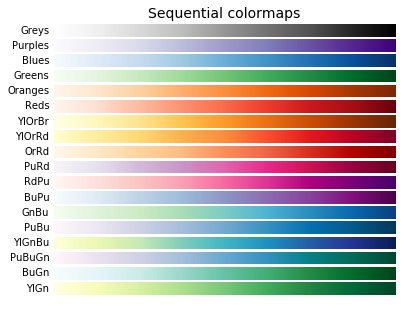

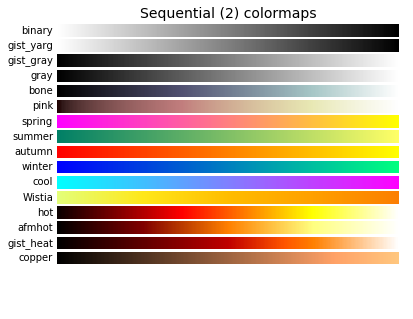

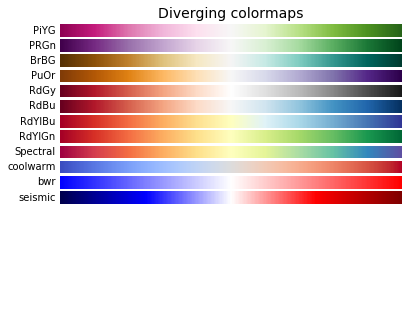

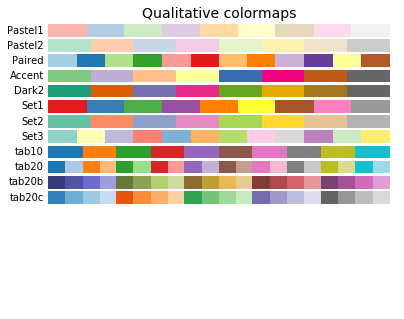

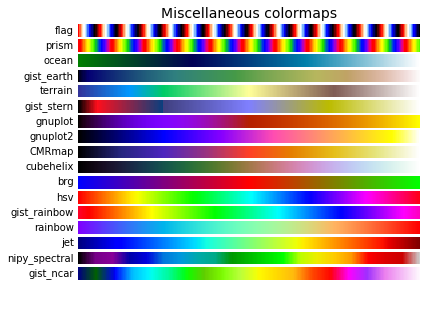

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
#select the cmap category which has most cmap so the height is largest
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))# for imshow
'''
imshow(x)
X : array-like or PIL image
The image data. Supported array shapes are:
(M, N): an image with scalar data. The data is visualized using a colormap.
(M, N, 3): an image with RGB values (float or uint8).
(M, N, 4): an image with RGBA values (float or uint8), i.e. including transparency.
'''

def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)
    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

cmaps have different types:
+ Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

+ Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

+ Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::
        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

In [4]:
print(type(plt.get_cmap('ocean')))#Sequential
print(type(plt.get_cmap('PiYG')))#Diverging
print(type(plt.get_cmap('Set1')))#Qualitative

<class 'matplotlib.colors.LinearSegmentedColormap'>
<class 'matplotlib.colors.LinearSegmentedColormap'>
<class 'matplotlib.colors.ListedColormap'>


For LinearSegmentedColormap cmap can map to x values, but for ListedColormap, if x > number of list(e.x. 9 colors in Set1), there will be some problems.

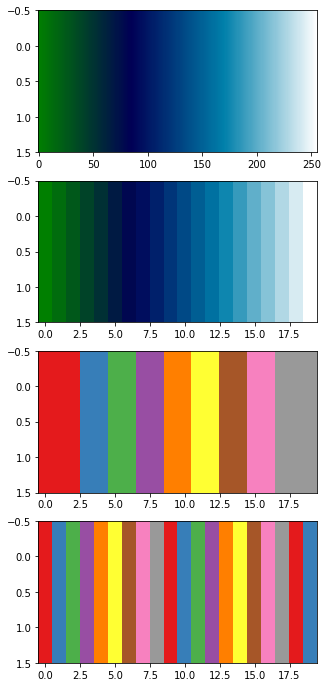

In [5]:
#for a single cmap

#no.1 256 for sequential
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))# for imshow
fig, axes = plt.subplots(nrows = 4,figsize = (5,12))
axes[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap('ocean'))

#no.2 20 for sequential
gradient = np.linspace(0, 1, 20)
gradient = np.vstack((gradient, gradient))# for imshow
axes[1].imshow(gradient, aspect='auto', cmap=plt.get_cmap('ocean'))

#no.3 20 for Set1(9) which is qualitative(listed colormap)
gradient = np.linspace(0, 1, 20)
gradient = np.vstack((gradient, gradient))# for imshow
axes[2].imshow(gradient, aspect='auto', cmap=plt.get_cmap('Set1'))

#no.4 make cmap num equal to X 
color_list = plt.cm.Set1(np.linspace(0, 1, 9))
color_list = np.concatenate((color_list,color_list,color_list[:2]))
cmap = colors.ListedColormap(color_list)

gradient = np.linspace(0, 1, 20)
gradient = np.vstack((gradient, gradient))# for imshow
axes[3].imshow(gradient, aspect='auto', cmap=cmap)
plt.show()


In [6]:
print(color_list)

[[0.89411765 0.10196078 0.10980392 1.        ]
 [0.21568627 0.49411765 0.72156863 1.        ]
 [0.30196078 0.68627451 0.29019608 1.        ]
 [0.59607843 0.30588235 0.63921569 1.        ]
 [1.         0.49803922 0.         1.        ]
 [1.         1.         0.2        1.        ]
 [0.65098039 0.3372549  0.15686275 1.        ]
 [0.96862745 0.50588235 0.74901961 1.        ]
 [0.6        0.6        0.6        1.        ]
 [0.89411765 0.10196078 0.10980392 1.        ]
 [0.21568627 0.49411765 0.72156863 1.        ]
 [0.30196078 0.68627451 0.29019608 1.        ]
 [0.59607843 0.30588235 0.63921569 1.        ]
 [1.         0.49803922 0.         1.        ]
 [1.         1.         0.2        1.        ]
 [0.65098039 0.3372549  0.15686275 1.        ]
 [0.96862745 0.50588235 0.74901961 1.        ]
 [0.6        0.6        0.6        1.        ]
 [0.89411765 0.10196078 0.10980392 1.        ]
 [0.21568627 0.49411765 0.72156863 1.        ]]


By using cmap = colors.ListedColormap(color_list), we can also create our defined cmap.